In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
# 3x^2 - 4x + 5
# 6x - 4
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


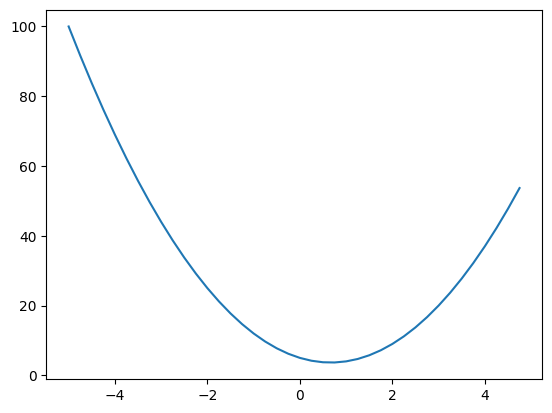

In [8]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [15]:
# single-var func 
h = 0.000001
x = 2/3
(f(x + h) - f(x)) / h

2.999378523327323e-06

In [16]:
# more complex? func of 3 scalars

a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [19]:
# partial derivative of multi variable
h = 0.0001
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
# partial derivative of f in respect for a, meaning a changing while
# b & c remain remain constant
# lesson learned: take a step back to think what's the output
# before execute to see the output
c += h
d2 = a*b + c
print("d1 = ", d1)
print("d2 = ", d2)
print('slope', (d2-d1)/h)

d1 =  4.0
d2 =  4.0001
slope 0.9999999999976694


In [26]:
# ver 1: mathematical expressions with value, its children with ops
class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    '''add method'''
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a*b; e.label='e'
d = e+c; d.label='d'
d._prev
d._op

'+'

In [33]:
# forward pass is just execute the mathematical expressions chain
# to get the final output
# backward pass: calc all partial derivative of the output (final loss func L)
# in respect to each node 
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L

Value(data=-8.0)

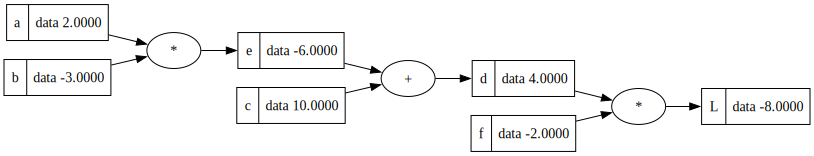

In [35]:
draw_dot(L)

In [38]:
# ver 2: adding grad. maintaining the variable that hold the partial derivative
class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self.grad = 0 # by default assume 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    '''add method'''
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a*b; e.label='e'
d = e+c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'

d._prev
d._op
L

Value(data=-8.0)

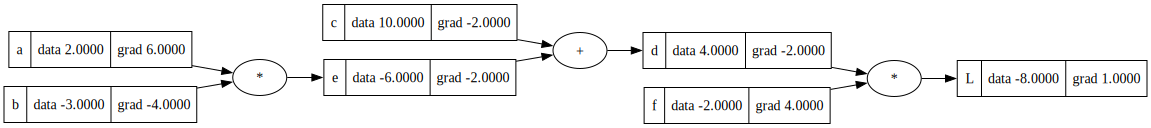

In [64]:
draw_dot(L)

In [63]:
# L.grad = 1.0
# c.grad = -2.0
# e.grad = -2.0
# d.grad = -2.0
# f.grad = 4.0
# a.grad = -2.0 * -3.0
# b.grad = -2.0 * 2.0

In [ ]:
# multiplication. grad value is the data value of the other variable
L = d*f 
dL/ dd = f

IMPORTANT: Crux of back propagation
Chain fucking rule
'plus' node is routing the gradient from the children to its parents

local derivative for sum

dd / dc = 1.0
dd / de = 1.0 by symmetry
d = c + e

(f(x+h) - f(x)) / h
-> (c + h + e - (c + e)) / h
-> h/h -> 1.0



dL / dc = dL/ dd * dd / dc
        = -2.0 * 1.0
-> c.grad = -2.0
   e.grad = -2.0

dL / de = -2.0

What's local derivative de/da & de/db?
e = a*b
de/da = b
de/db = a

dL / da = (dL / de) * (de/ da) 
        = -2.0 * -3.0


In [67]:
# test grad value
def lol():
    # add small amount h
    h = 0.0000001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label="a")
    b = Value(-3.0+h, label="b")
    c = Value(10.0, label="c")
    e = a*b; e.label='e'
    d = e+c; d.label='d'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    
    print((L2-L1)/ h)
lol()
    
    

-3.9999999934536845


In [68]:
# single optimization step: make L go up
# -> notch variables in the direction of grad
# those below are leave nodes that we have control. expect to increase positively
# the role of grad is to give us power to influence the final outcome
a.data += 0.01 * a.grad 
b.data += 0.01 * b.grad 
c.data += 0.01 * c.grad 
f.data += 0.01 * f.grad

# rerun forward pass - recalculate L

e = a*b
d = e+c
L = d*f

print(L.data)


-7.286496


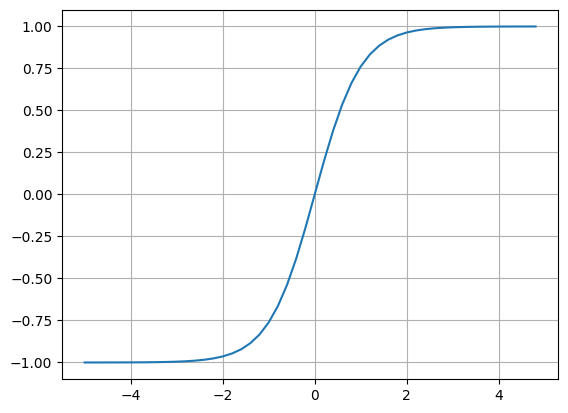

In [71]:
# manual backproagation with a neuron
# activation function ~ squashing function (sigmoid or tanh)
# use tanh for now

# tanh function: squashing the output limit to -1 -> 1
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [222]:
# ver 3: add activation function, add more operations
class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self.grad = 0 # by default assume 0
        # function, do chain rule, how chain output gradient based on local gradient
        # for leaf node there's nothing to do. WHY?
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    '''add method'''
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        '''
        take local derivative 
        '''
        def _backward():
            self.grad += 1.0 * out.grad # simply copy
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad # mul chain rule
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    def __rmul__(self, other): # a fall back: other * self
        return self * other
    
    def __truediv__(self, other): # self / other
        return self * other**-1
    
    def __neg__(self): # -self
        return self * -1
    
    def __sub__(self,other): # self - other
        return self + (-other)
    
    def __pow__(self, other):
        # force other to be int or float
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')
        # data ^ other
        def _backward():
            self.grad += ((other) * (self.data ** (other-1))) * out.grad # exercise :)
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) -1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += math.exp(x) * out.grad # ??? exercise :)
        out._backward = _backward
        return out
    
    def backward(self):
        # call backward in every node in order from output to input
        # in toplogical graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
    
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a*b; e.label='e'
d = e+c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'

d._prev
d._op
L

Value(data=-8.0)

In [166]:
# inputs x1,×2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + xw*w2 + b -> cell body only
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2. label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n' 

# add activation function
o = n.tanh(); o.label ='o'
o.backward()

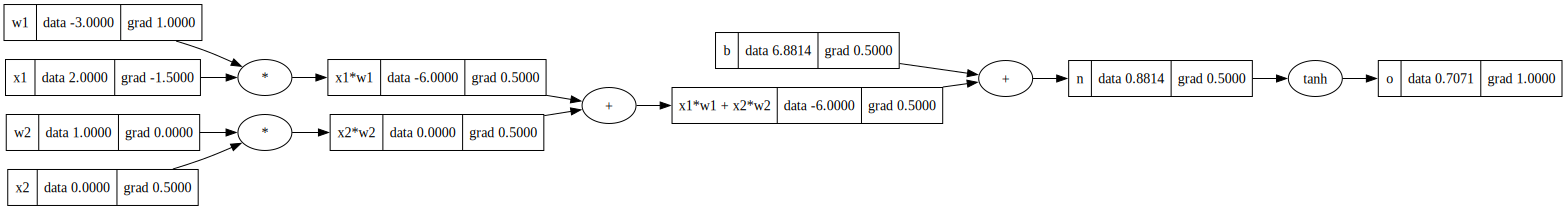

In [167]:
draw_dot(o)

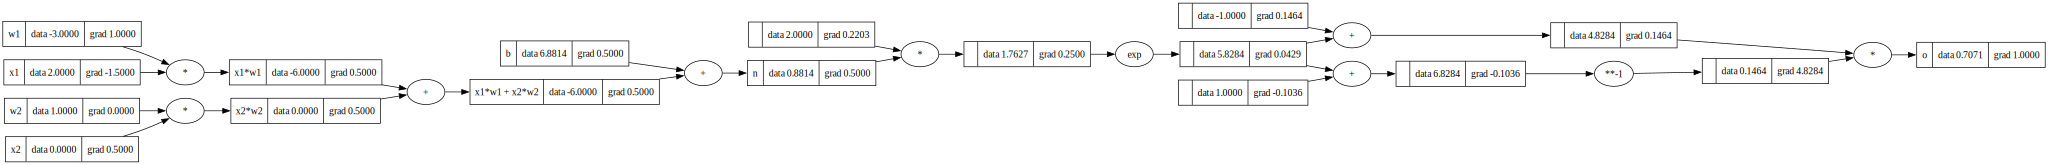

In [168]:
# breaking up tanh into more primitive one
# 
# expect more nodes and same grad
# inputs x1,×2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + xw*w2 + b -> cell body only
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2. label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n' 
# ----
e = (2*n).exp()
o = (e-1) / (e+1)
# ----
o.label ='o'
o.backward()

draw_dot(o)


In [127]:
o.backward() # DAMNNNNNNNNNNNNNNN

In [160]:
#BUG: cannot add constant, no 1.data
# wrap into Value
a = Value(2.0)
b = Value(4.0)
a-b

# a/b

# a * (1/b)
# a * b**-1
# implement x**k

# a.exp()
# a+1
# 2*a


# a*2
# a.__mul__(2)

# 2*a
# 2.__mul__(a)


Value(data=-2.0)

In [120]:
o.grad = 1.0
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

In [117]:
# topological sort
# build topological graph
# starting at root node (e.g o). go through all children
# lay them out from left to right
# only guarantee in the list after all the children are in the list
# we use this to call back propagation in correct order
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [106]:
# WHY initialize o.grad = 1.0 in the beginning?
o.grad = 1.0

In [107]:
# propagate grad through tanh
o._backward()

In [109]:
# this should propagate grad through b & x1w1+x2w2
n._backward()

In [111]:
# b: nothing would happen as leaf node. because it does not have parent to propagate grad
b._backward()


In [112]:
x1w1x2w2._backward()

In [114]:
x2w2._backward()
x1w1._backward()

# until now we do manual propagation manually in each node
# How to propagate the whole mathematical expressions?
# At a node, we have to do propagation for every node after it before


In [96]:
# o.grad = 1.0
# n.grad = 0.5 # 1-n.data**2

# local derivative passing with plus
# x1w1x2w2.grad = 0.5
# b.grad = 0.5

# x1w1.grad = 0.5
# x2w2.grad = 0.5

# do / dx1 = do / dx1w1 * dx1w1 / dx1
#          = x1w1.grad        *  w1.data
# do / dw1 = do / dx1w1 * dx1w1 / dw1
#          = x1w1.grad        *  x1.data
# x1.grad = x1w1.grad * w1.data
# w1.grad = x1w1.grad * x1.data

# do / dx2 = do / dx2w2 * dx2w2 / dx2
#          =  x2w2.grad    *  w2.data
# do / dw2 = do / dx2w2 * dx2w2 / dw2
#          = x2w2.grad  *  x2.data
# the fact that w2.grad = 0 show that when we wiggle w2
# it does not affect the output because we multiple with x2 = 0
# x2.grad = x2w2.grad * w2.data
# w2.grad = x2w2.grad * x2.data




In [ ]:
# o = tanh(n)
# do/ dx = 1 - o** 2

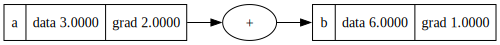

In [137]:
# BUG: b.grad should be 2
# a + a setting grad override on a same Value node
a = Value(3.0, label='a')
b = a + a; b.label='b'
b.backward()

draw_dot(b)


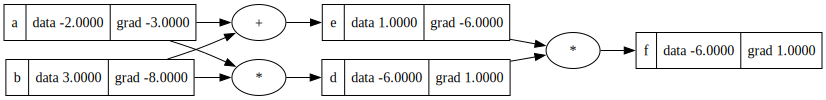

In [138]:
# a variable is used more than once
# multivariable chain rule: accumulate gradient. WHY?
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'
f.backward()
draw_dot(f)

In [224]:
# core Value obj of micrograd
class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    '''add method'''
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data,(self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward 
        return out
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        return out
    def __rmul__(self, other): # other * self
        return self * other
    def __truediv__(self, other): #self / other
        return self * other**-1
    def __neg__(self): # -self
        return self * -1
    def __sub__(self, other): # self - other
        return self + (-other)
    def __radd__(self, other): # other + self
        return self + other
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/ (math.exp(2*x) + 1)
        
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    def backward(self):
        # call backward in every node in order from output to input
        # in toplogical graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
a = Value(2.0)
b = Value(4.0)
a - b

Value(data=-2.0)

In [37]:
# viz graph
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s |  data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # connect the op node to the value node
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        # connect the value nodes
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

In [169]:
# inputs x1,×2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.88128937917234981729487, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2. label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# activation function?
o = n.tanh(); o.label ='o'

o.backward()

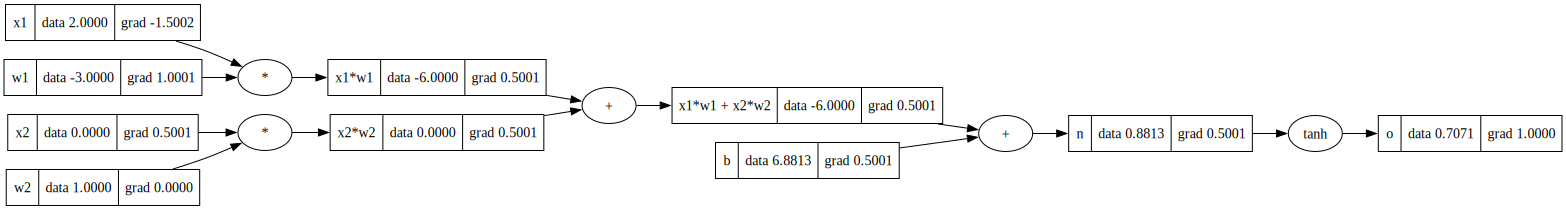

In [14]:
draw_dot(o)

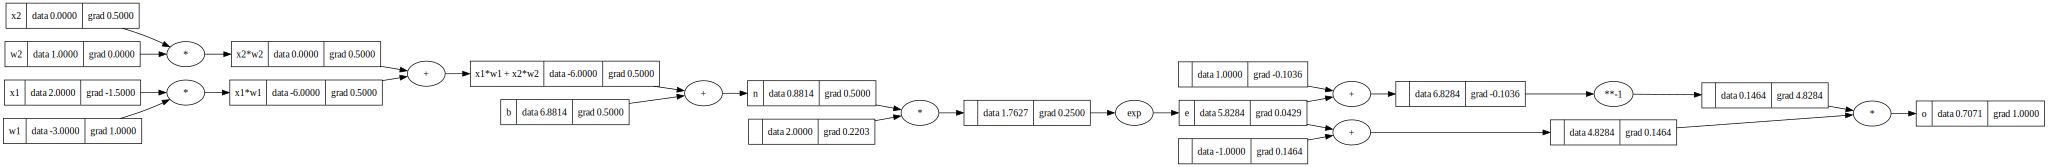

In [22]:
# inputs x1,×2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2. label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# activation function?
e = (2*n).exp(); e.label = "e"
o = (e-1) / (e+1)
# ---
o.label ='o'

o.backward()
draw_dot(o)

In [171]:
import torch


In [176]:
# 2x3 array of scalars
torch.Tensor([[1,2,3], [4,5,6]]).shape

torch.Tensor([2.0]).dtype # by default float32
torch.Tensor([2.0]).double().dtype # casting to float64


torch.float64

In [178]:
# doing the same thing but in Pytorch
# n-dimensional arrays of scalars
# explicitly require gradients
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data) # a tensor
print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)
0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [234]:

# build out Neural nNet
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    # 
    def __call__(self, x):
        # w*x +b
        # multiple all values of x with corresponding w
        # raw activation
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    # parameters
    # return a list of parameters
    def parameters(self):
        return self.w + [self.b]
      
# set of neurons evaluated individually
class Layer:
  # number of input & output
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  # WHY: What's the point of this?
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

# entire neural network
class MLP:
  # number of inputs & list of size of all layers
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
        x = layer(x)
    return x
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]



In [187]:
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=-0.9959603344350894)

In [194]:
x = [2.0, 3.0]
n = Layer(2, 3)
n(x)

[Value(data=-0.9850424260139965),
 Value(data=0.6095800905197368),
 Value(data=-0.9904817241147812)]

<img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="Drawing" style="width: 300px;"/>

In [302]:
# init neural net
x = [2.0, 3.0, -1]
n = MLP(3, [4,4,1]) # 3 inputs into 2 layers of 4 and 1 output
n(x)

Value(data=-0.7277608063078151)

In [238]:
# all the weight and biases in the neural net
len(n.parameters())

41

In [ ]:
draw_dot(n(x))

In [278]:
# tiny dataset, 4 examples, 4 possible inputs with 4 desired output. binary classifier
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred
# tune the weight to have output closer to the desired targets

[Value(data=0.018031382334037713),
 Value(data=-0.5551943244849779),
 Value(data=-0.500966973298665),
 Value(data=-0.1816769715045377)]

In [279]:
# single number that measure how well the model performing
# mean squared error loss
# zip the ground truth with prediction
# subtract and square. How close from the desired target.
# The more off, the greater value

# [(yout - ygt) **2 for ygt, yout in zip(ys, ypred)]

# final loss = sum of all number
# the lower the better
loss = sum((yout - ygt) **2 for ygt, yout in zip(ys, ypred))
loss


Value(data=2.8075088817740075)

In [251]:
# forward pass
# before
ypred = [n(x) for x in xs]

loss = sum((yout - ygt) **2 for ygt, yout in zip(ys, ypred))
loss

Value(data=6.89129652696487)

In [299]:
# 1. forware pass: after, expect lower loss
ypred = [n(x) for x in xs]

loss = sum((yout - ygt) **2 for ygt, yout in zip(ys, ypred))
loss

Value(data=0.09234085913965973)

In [294]:
# 2. back pass propagation
loss.backward() # magical thing happen

In [295]:
n.layers[0].neurons[0].w[0].grad

-0.6103617717196572

In [296]:
n.layers[0].neurons[0].w[0].data

-0.1232589946709438

In [297]:
# 3. update all value data
# if we go too fast then it will overstep. WHAT DOES IT MEAN?
# learning rate: too low -> too long to get the desired output
# too high -> the whole thing got unstable. could explode the loss
for p in n.parameters():
    p.data += -0.05 * p.grad

In [298]:
ypred

[Value(data=0.9406280106124281),
 Value(data=-0.8051740970926612),
 Value(data=-0.4177613418542815),
 Value(data=0.9121772477791227)]

In [ ]:
draw_dot(loss)

In [308]:
# put it together

for k in range(20): # 20 steps
    # 1. forward pass
    # evaluate the loss
    ypred = [n(x) for x in xs]
    # measure total performance (how well it performance) of the neural net 
    # not well -> high. need to reduce
    # [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]
    # final lost = sum of all losses
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # zero out all the gradients
    # most common mistake: forgot to .zero_grad() before .backward()
    # why do that?
    # before: .grad start at 0 -> do backward -> fill grad -> update the data -> don't flush the grad, it stays there
    # when do 2nd forward pass -> backward -> gradient just add up, never get to reset to 0
    # note: the only reason the process work before is because it's a simple problem
    # very easy for nn to fit the data. not zero grads make it wiggle very big step of grad
    for p in n.parameters():
        p.grad = 0.0

    # 2. backward pass
    loss.backward()

    # 3. update
    # gradient descent: thinking of gradient as a vector pointing in the direction of increasing loss (?)
    # put negative sign so we can reduce the loss, minimize the loss
    # modify p.data by small step side value in the direction of the grad
    # increase data make the loss go down
    # backward pass
    learning_rate = -0.05
    for p in n.parameters():
        p.data += learning_rate * p.grad
    print(k, loss.data)



0 0.010248349706428107
1 0.010059798007728049
2 0.009877767564509969
3 0.009701931860712738
4 0.009531985602055464
5 0.009367643030507227
6 0.009208636396182364
7 0.009054714569826781
8 0.008905641781079613
9 0.008761196469450271
10 0.008621170236472499
11 0.008485366888826099
12 0.00835360156337303
13 0.008225699926068399
14 0.008101497437594002
15 0.007980838679339844
16 0.007863576734045027
17 0.007749572616012168
18 0.0076386947463418665
19 0.0075308184691043065


In [309]:
ypred

[Value(data=0.9598147711541156),
 Value(data=-0.9635520362632515),
 Value(data=-0.9531940688805723),
 Value(data=0.9510437276419429)]